In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
acc_with_g = pd.read_csv('../data/acc/phyphox-test/Accelerometer2.csv')
acc_without_g = pd.read_csv('../data/acc/phyphox-test/Linear Accelerometer2.csv')
len(acc_with_g)

4468

In [3]:
len(acc_without_g)

4467

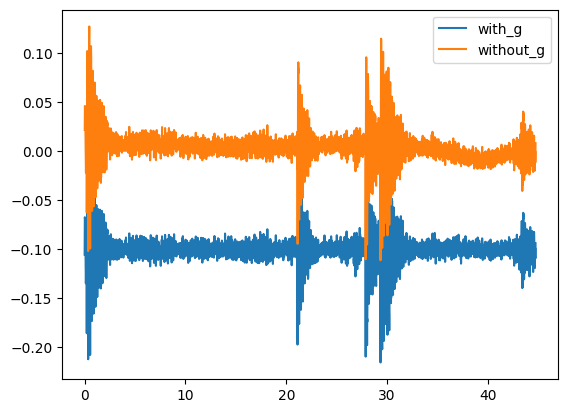

In [4]:
plt.plot(acc_with_g['Time (s)'].to_numpy(), acc_with_g['X (m/s^2)'].to_numpy())
plt.plot(acc_without_g['Time (s)'].to_numpy(), acc_without_g['X (m/s^2)'].to_numpy())
plt.legend(['with_g', 'without_g'])

In [5]:
N = len(acc_without_g)
g_vals = np.zeros((N, 3))
for i in range(N):
    g_vals[i] = np.array([acc_with_g['X (m/s^2)'].iloc[i+1]-acc_without_g['X (m/s^2)'].iloc[i], acc_with_g['Y (m/s^2)'].iloc[i+1]-acc_without_g['Y (m/s^2)'].iloc[i], acc_with_g['Z (m/s^2)'].iloc[i+1]-acc_without_g['Z (m/s^2)'].iloc[i]])

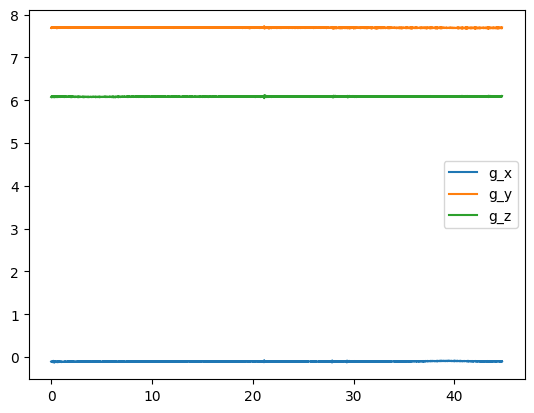

In [6]:
plt.plot(acc_without_g['Time (s)'].to_numpy(), g_vals[:, 0])
plt.plot(acc_without_g['Time (s)'].to_numpy(), g_vals[:, 1])
plt.plot(acc_without_g['Time (s)'].to_numpy(), g_vals[:, 2])
plt.legend(['g_x', 'g_y', 'g_z'])

In [7]:
g = g_vals.mean(axis=0)
g_norm = np.linalg.norm(g)
g_unit_vec = g/g_norm
print(g_unit_vec)

[-0.0105559   0.78431502  0.62027294]


In [9]:
acc = acc_with_g[['X (m/s^2)', 'Y (m/s^2)', 'Z (m/s^2)']].to_numpy()
print(len(acc))
acc_uc = acc[1:]
print(len(acc_uc))

4468
4467


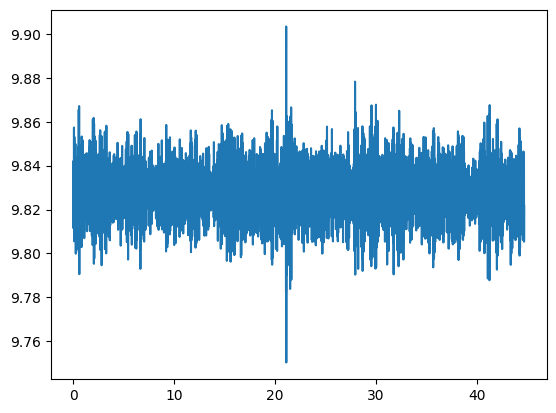

In [22]:
acc_ro_G = np.dot(acc_uc, g_unit_vec)
plt.plot(acc_without_g['Time (s)'].to_numpy(), acc_ro_G)

In [23]:
print("mean:", acc_ro_G.mean())
print("SD: ", acc_ro_G.std())

mean: 9.827676261907898
SD:  0.012943823610540868


In [17]:
acc_data_new = pd.DataFrame()
acc_data_new['x_acc'] = acc_with_g['X (m/s^2)'][1:]
acc_data_new['y_acc'] = acc_with_g['Y (m/s^2)'][1:]
acc_data_new['z_acc'] = acc_with_g['Z (m/s^2)'][1:]
acc_data_new = acc_data_new.reset_index(drop=True)

In [21]:
ax = acc_data_new['x_acc'].mean()
ay = acc_data_new['y_acc'].mean()
az = acc_data_new['z_acc'].mean()

alpha = np.arctan2(ay, az)
beta = np.arctan(-ax/np.sqrt(ay**2 + az**2))
rotation_matrix_alpha = np.array(
    [[1,0,0], 
    [0,np.cos(alpha), -np.sin(alpha)],
    [0, np.sin(alpha), np.cos(alpha)]]
)
rotation_matrix_beta = np.array(
    [[np.cos(beta), 0, np.sin(beta)],
    [0,1,0],
    [-np.sin(beta), 0, np.cos(beta)]]
)
rotation_matrix_1 = rotation_matrix_beta@rotation_matrix_alpha
rotated_1 = np.dot(rotation_matrix_1, np.array([ax, ay, az]))
gamma = np.arctan2(rotated_1[0], rotated_1[1])
rotation_matrix_gamma = np.array(
    [[np.cos(gamma), -np.sin(gamma), 0], 
    [np.sin(gamma), np.cos(gamma), 0], 
    [0, 0, 1]]
)
rotation_matrix = rotation_matrix_gamma@rotation_matrix_1
data = acc_data_new[['x_acc', 'y_acc', 'z_acc']]
rotated_data = np.dot(rotation_matrix, np.array(data).T)

Reoriented [ax, ay, az] = [ 3.49197078e-18 -4.27505455e-16  9.82767815e+00]


In [29]:
acc_ro_Euler = rotated_data[2, :]
print("Mean: ", acc_ro_Euler.mean())
print("SD: ", acc_ro_Euler.std())

Mean:  9.827678146975414
SD:  0.012942987833940357


In [30]:
print("mean:", acc_ro_G.mean())
print("SD: ", acc_ro_G.std())

mean: 9.827676261907898
SD:  0.012943823610540868
